In [35]:
# generic
import pandas as pd
import os, glob
import numpy as np
import scipy as sp

# geospatial plotting
import cartopy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy import config
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.io.img_tiles import GoogleTiles

# display
from IPython.display import Image

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# handling netCDFs
from netCDF4 import Dataset
import xclim as xc
import xarray as xr

In [36]:
# open a netCDFs downloaded from the curl script
# read in all the netcdfs in a folder, and make a dict with the run number as the key and xarrays values

def parse_data(fp_to_nc_folder):

    # lists to hold the netcdfs and their run numbers 
    run_numbers = []
    nc_names = []

    # read all the files matching the input file path
    for nc_file in glob.glob(fp_to_nc_folder):

        # open them!
        with open(os.path.join(os.getcwd(), nc_file), 'r') as f: 

            # extract the run number from the file name and add it to a list to ID each file
            # this assumes all ARISE-SAI files have more or less the same filename and location of the run number within it, may need to be updated
            run_numbers.append(pd.Series(nc_file).str.split(pat = 'DEFAULT.')[0][1].split('.cam')[0])

            # open each nc file and add that to another list
            nc_names.append(xr.open_dataset(nc_file))

    # combine the lists into a dict ordered by keys (run numbers low to high)
    data_dict = dict(sorted(dict(zip(run_numbers, nc_names)).items()))

    return(data_dict)

# use this function on the TMSO2 data
TMSO2_dict = parse_data('./project-data/TMSO2/*.nc')

In [37]:
# check array dimensions 
#TMSO2_dict['001'].variables['TMSO2'][0,:,:].shape, dataset.variables['lat'].shape, dataset.variables['lon'].shape

In [42]:
dataset = TMSO2_dict['001']#.sel(time=slice("2035-01-01", "2036-01-02"))
tmso2 = dataset.variables['TMSO2'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

In [56]:
dataset.time.max()

<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(2070, 1, 1, 0, 0, 0, 0), dtype=object)

Text(0.5, 1.0, 'Mean SO2 Column Burden - ARISE-SAI-1.5 Ensemble 1 2035-2070 - (kg m^-2)')

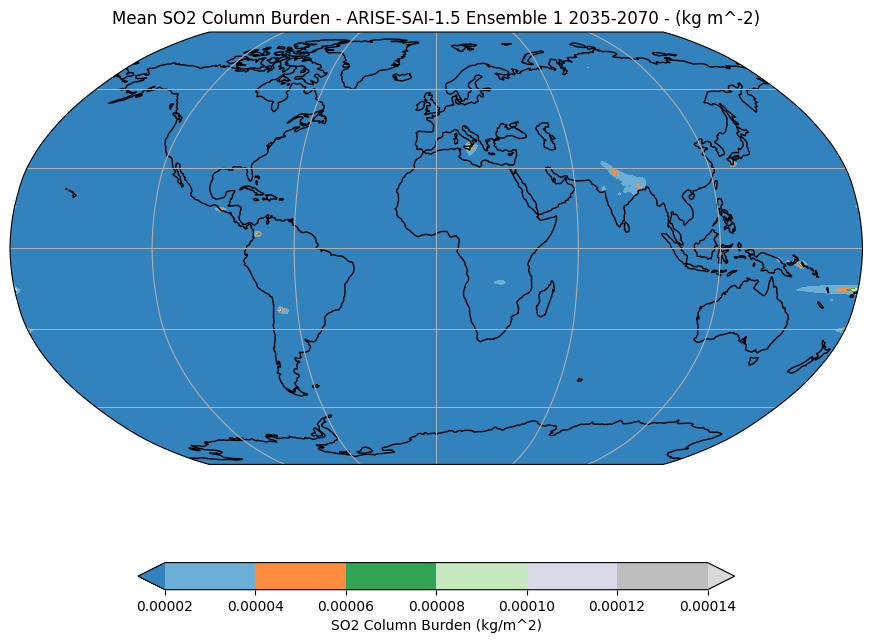

In [58]:
# mean across time of TMSO2 data
ds = dataset
ds_mean = dataset.mean(dim = 'time')

# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean['TMSO2']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
               transform = ccrs.PlateCarree(),
               cmap = 'tab20c',
               extend = 'both')

# Add coastlines
ax.coastlines()

# add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='SO2 Column Burden (kg/m^2)')

# Add title
plt.title('Mean SO2 Column Burden - ARISE-SAI-1.5 Ensemble 1 2035-2070 - (kg m^-2)')

In [ ]:
# The first five members of ARISE-SAI-1.5 simulations were initialized in 2035 from the first five members (001 to 005) 
# of the SSP2-45 simulations carried out with CESM2(WACCM6); hence, all had different initial ocean, sea-ice, land, 
# and atmospheric initial conditions on January 1, 2035. Similarly to the SSP2-45 simulations, subsequent ensemble members 
# (006 through 010) were initialized from the same initial conditions as members 001 through 005, respectively, 
# with an addition of a small temperature perturbation to the atmospheric initial condition to create ensemble spread.
# ([6, 7, 8, 9, 10] x 10ˆ-14 K, respectively)